In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [466]:
im = cv2.imread('investigation_data/dog.jpg')[..., 0]
im = cv2.resize(im, (257, 257))

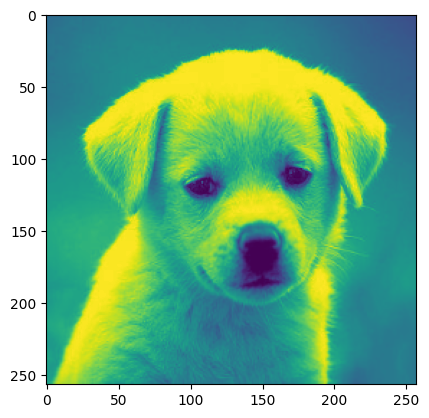

In [467]:
plt.imshow(im)

In [468]:
def get_1_binary_plane(im):
    return np.bitwise_and(im, 1)

In [469]:
def insert_noise(im, idx, noise):
    im_flat = im.flatten().copy()
    chosen_pix = im_flat[idx]
    np.bitwise_and(chosen_pix, 254, out=chosen_pix)
    np.bitwise_or(chosen_pix, noise, out=chosen_pix)
    im_flat[idx] = chosen_pix
    return im_flat.reshape(im.shape)

In [498]:
im1 = insert_noise(im, np.random.permutation(int(im.size * 0.2)), np.random.randint(0, 2, size=int(im.size * 0.2), dtype='uint8'))
im2 = insert_noise(im, np.random.permutation(int(im.size * 0.8)), np.random.randint(0, 2, size=int(im.size * 0.8), dtype='uint8'))

In [499]:
im_plane0 = get_1_binary_plane(im)
im_plane1 = get_1_binary_plane(im1)
im_plane2 = get_1_binary_plane(im2)

Предпосылка: первая битовая плоскость содержит информацию, что закодирована в пространственной области (имеется корреляция соседних отсчетов). Как правило основная часть информации представляет собой низкочастотный сигнал (относительно плавные перепады яркости в силу особенностей геометрии естественных объектов). Напротив, шум является высокочастотным сигналом. 

Учитывая данную предпосылку, спектры естественных изображений и шума (или зашумленных изображений) должны ощутимо отличаться. Пользуясь данным выводом, в качестве признаков будут использоваться спектральные отсчеты результата ДПФ.

In [500]:
#im_plane0_ = np.fft.fftshift(im_plane0 / np.sum(im_plane0 ** 2))
#im_plane1_ = np.fft.fftshift(im_plane1 / np.sum(im_plane1 ** 2))
#im_plane2_ = np.fft.fftshift(im_plane2 / np.sum(im_plane2 ** 2))

fft0 = np.fft.fft2(im_plane0 / np.sum(im_plane0 ** 2))
fft1 = np.fft.fft2(im_plane1 / np.sum(im_plane1 ** 2))
fft2 = np.fft.fft2(im_plane2 / np.sum(im_plane2 ** 2))

In [493]:
# --- DO NOT RUN ---
im_plane0_ = np.fft.fftshift(im_plane0 / np.sum(im_plane0 ** 2))
im_plane1_ = np.fft.fftshift(im_plane1 / np.sum(im_plane1 ** 2))
im_plane2_ = np.fft.fftshift(im_plane2 / np.sum(im_plane2 ** 2))

fft0_ = np.fft.fft2(im_plane0_)
fft1_ = np.fft.fft2(im_plane1_)
fft2_ = np.fft.fft2(im_plane2_)

fft0 = np.fft.fftshift(fft0_)
fft1 = np.fft.fftshift(fft1_)
fft2 = np.fft.fftshift(fft2_)

<AxesSubplot: >

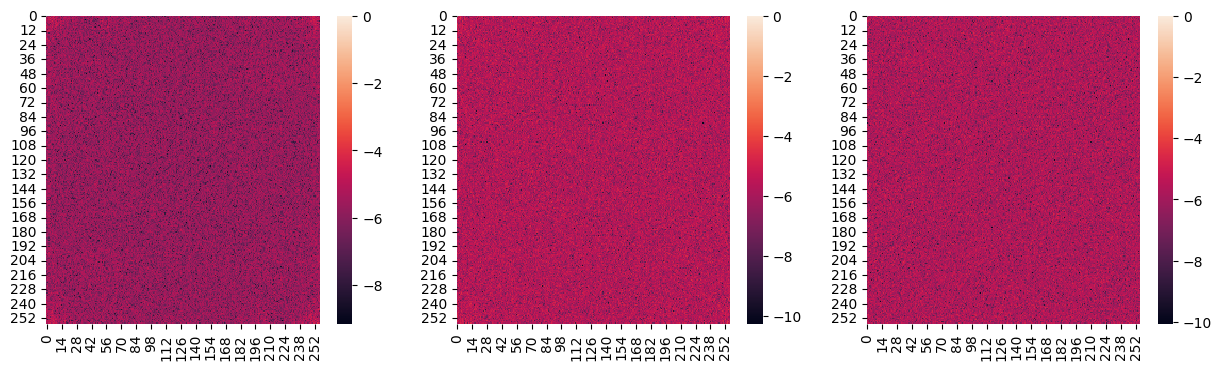

In [501]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.heatmap(np.log(np.abs(fft0) + 1e-4))
plt.subplot(1, 3, 2)
sns.heatmap(np.log(np.abs(fft1)))
plt.subplot(1, 3, 3)
sns.heatmap(np.log(np.abs(fft2)))

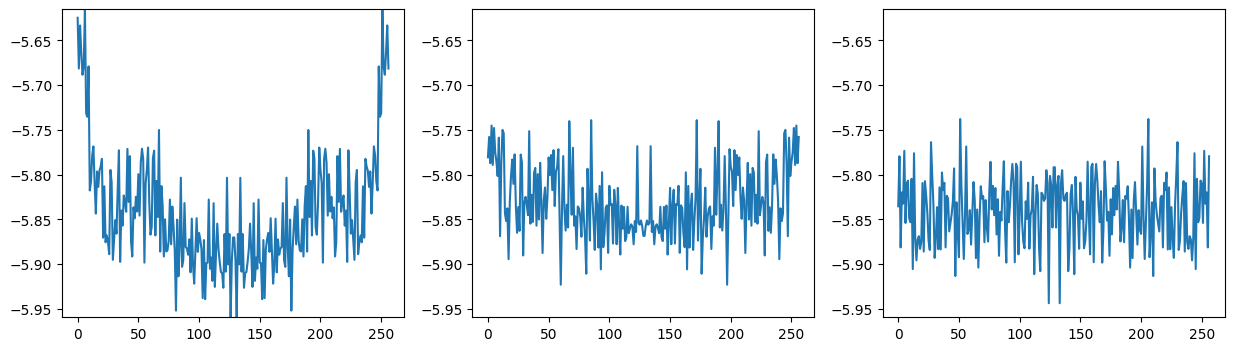

In [502]:
log_fft = np.log(np.abs(fft0) + 1e-6).mean(axis=0)
y_max, y_min = log_fft.max(), log_fft.min()
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.ylim(y_min, y_max)
plt.plot(np.log(np.abs(fft0) + 1e-6).mean(axis=0))
plt.subplot(1, 3, 2)
plt.ylim(y_min, y_max)
plt.plot(np.log(np.abs(fft1) + 1e-6).mean(axis=0))
plt.subplot(1, 3, 3)
plt.ylim(y_min, y_max)
plt.plot(np.log(np.abs(fft2) + 1e-6).mean(axis=0))

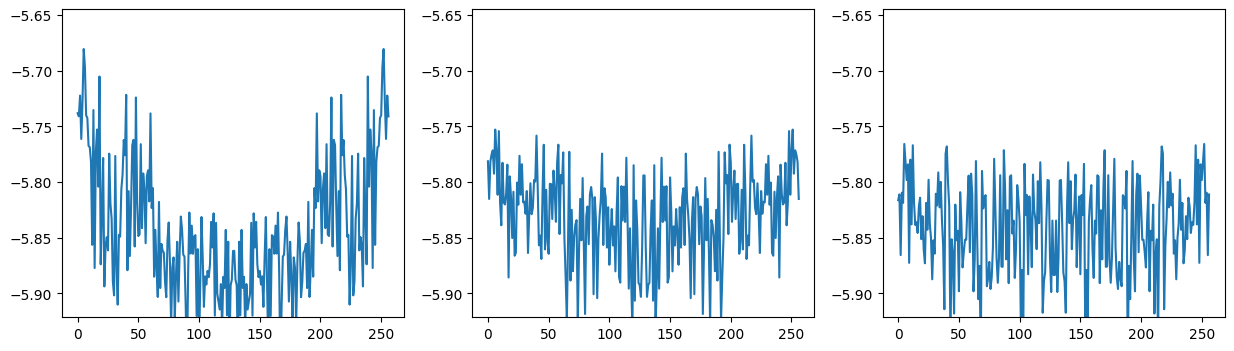

In [503]:
log_fft = np.log(np.abs(fft0) + 1e-4).mean(axis=1)
y_max, y_min = log_fft.max(), log_fft.min()
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.ylim(y_min, y_max)
plt.plot(np.log(np.abs(fft0) + 1e-6).mean(axis=1))
plt.subplot(1, 3, 2)
plt.ylim(y_min, y_max)
plt.plot(np.log(np.abs(fft1) + 1e-6).mean(axis=1))
plt.subplot(1, 3, 3)
plt.ylim(y_min, y_max)
plt.plot(np.log(np.abs(fft2) + 1e-6).mean(axis=1))

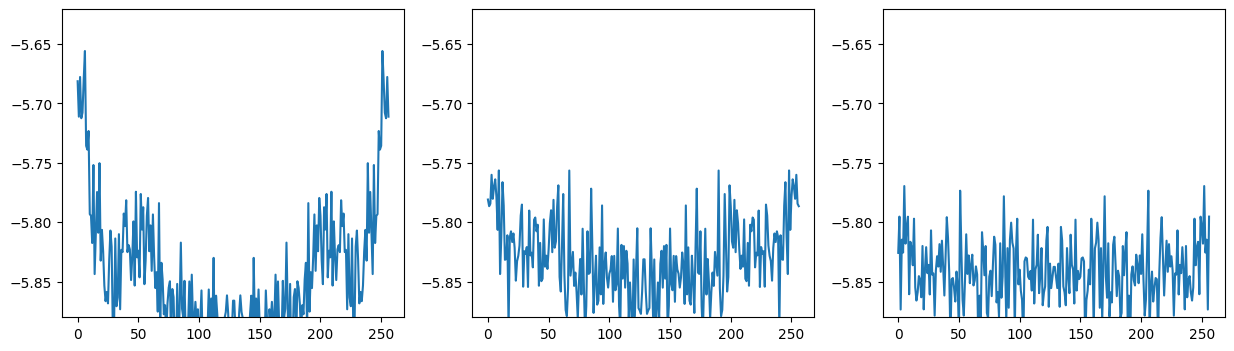

In [504]:
log_fft = (np.log(np.abs(fft0) + 1e-4).mean(axis=1) + np.log(np.abs(fft0) + 1e-4).mean(axis=0))/2
y_max, y_min = log_fft.max(), log_fft.min()
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.ylim(y_min, y_max)
plt.plot((np.log(np.abs(fft0) + 1e-6).mean(axis=1) + np.log(np.abs(fft0) + 1e-6).mean(axis=0))/2)
plt.subplot(1, 3, 2)
plt.ylim(y_min, y_max)
plt.plot((np.log(np.abs(fft1) + 1e-6).mean(axis=1) + np.log(np.abs(fft1) + 1e-6).mean(axis=0))/2)
plt.subplot(1, 3, 3)
plt.ylim(y_min, y_max)
plt.plot((np.log(np.abs(fft2) + 1e-6).mean(axis=1) + np.log(np.abs(fft2) + 1e-6).mean(axis=0))/2)

На графиках явно видно, что в случае естественных изображений энергия концентрируется на краях спектральной области, что является их отличительным признаком.

P.S. Была проведена подобная визуализация на десятке других изображений и наблюдения показали, что данный паттерн не всегда соблюдается. Однако он достаточно частый, чтобы данный набор признаков можно было использовать для детектирования встройки шума в 1 битовую плоскость.

In [505]:
def exp_filter(x, coef=0.99):
    prev_val = x[0]
    new_x = [x[0]]
    for _x in x[1:]:
        prev_val = prev_val * coef + _x * (1 - coef)
        new_x.append(prev_val)
    return new_x

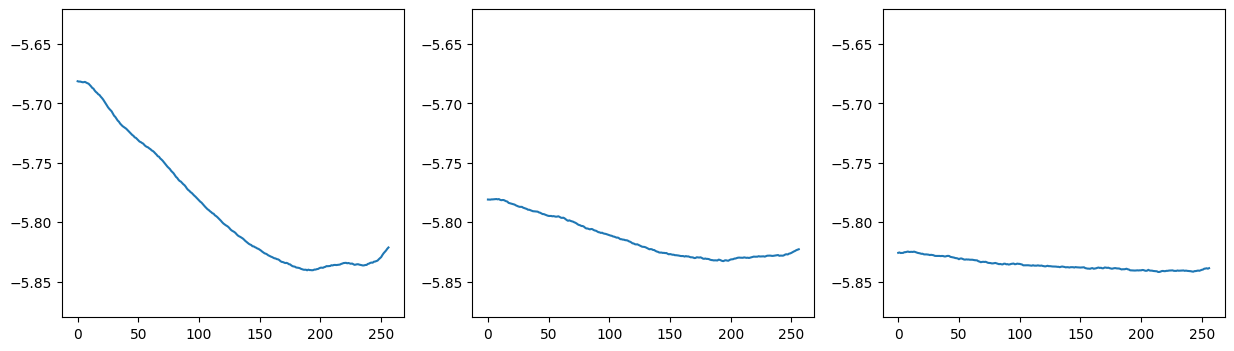

In [506]:
log_fft = (np.log(np.abs(fft0) + 1e-4).mean(axis=1) + np.log(np.abs(fft0) + 1e-4).mean(axis=0))/2
y_max, y_min = log_fft.max(), log_fft.min()
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.ylim(y_min, y_max)
plt.plot(exp_filter((np.log(np.abs(fft0) + 1e-6).mean(axis=1) + np.log(np.abs(fft0) + 1e-6).mean(axis=0))/2))
plt.subplot(1, 3, 2)
plt.ylim(y_min, y_max)
plt.plot(exp_filter((np.log(np.abs(fft1) + 1e-6).mean(axis=1) + np.log(np.abs(fft1) + 1e-6).mean(axis=0))/2))
plt.subplot(1, 3, 3)
plt.ylim(y_min, y_max)
plt.plot(exp_filter((np.log(np.abs(fft2) + 1e-6).mean(axis=1) + np.log(np.abs(fft2) + 1e-6).mean(axis=0))/2))